<a href="https://colab.research.google.com/github/remuloc/MVP_RF_DATASET/blob/main/MVP_RF_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Descrição do Problema:

- Foram realizadas medidas de RF com rádio digital na faixa de 2400-2480 MHz. As medições correspondem ao sinal de comunicação estabelecido entre o drone e a estação de controle. Foram utilizado três tipos de drones: Phantom, AR e Bepop.

- Essas medidas foram capturadas com dois rádios digitais que podem ser conectados a um computador e possuem a capacidade de exportar em tabela csv os dados obtidos. 

- Vale destacar que o sinal entre drone e estação de controle é analógico, sendo do tipo de salto de frequência. Ou seja, o sinal de comunicação utiliza vários frequências, saltando de uma frequência para outra rapidamente. O dado de controle é enviado dentro dessa portadora que fica variando sua frequência para dar robustez ao enlace e evitar interferências.

- Em cada pasta, existem arquivos brutos csv organizados de acordo com a divisão faixa High(2400-2440 MHz) e faixa Low(2440 MHz-2480 MHz). Por exemplo: os arquivos  10100H_0.csv corresponde a medição da faixa High; e sua correspondente faixa Low 10100L_0 no Folder 10100H.

- Essas medidas de FFT serão usadas para identificar a assinatura RF do drone. O problema pode ser usado para aprendizado supervisionado, como identificação de presença ou não de drone a partir da detecção do nível de energia.

- São empregados dois rádios com capacidade para visualizar sinais com banda de 40 MHz. Assim, os dois equipamentos monitoram o espectro, sendo um deles na faixa de 2400 a 2440 MHz e o outro na faixa de 2440 a 2480 MHz. Por isso, os arquivos sempre serão divididos como exemplo: 11000H.csv tem dados de 2440 a 2480 MHz.
11000L.csv tem dados de 2400 a 2440 MHz.

- Neste trabalho serão empregados as medições referente ao modo de voo e conectado dos drones Phantom, AR e Bepop.
Correspondem a esses drones às variáveis X, Y e Z,  que serão utilizadas ao longo do código

Fontes:

- https://mdpi-res.com/d_attachment/sensors/sensors-21-01947/article_deploy/sensors-21-01947-v3.pdf?version=1615971802 

- https://www.asianmilitaryreview.com/2019/05/rf-techniques-for-detection-classification-and-location-of-commercial-drone-controllers/

- https://www.sciencedirect.com/science/article/pii/S2352340919306675

In [6]:
# Baixa as bibliotecas para processamento de sinal cientifico
# scipy permite o cálculo de transformada de fourier e de nível de energia
# numpy e PANDAS faz o processamento de sinais em array
# matplotlib faz impressão do gráfico em tela

import scipy.signal as sig   
import scipy.io  as scio

import numpy as np           
import pandas as pd          
import matplotlib.pyplot as plt 
import os

import librosa                
import librosa.display

# Rotina para baixar os arquivos do dataset no caminho /content/drive/MyDrive/:

lista_arquivos = []
contador = 0
path = r'/content/drive/MyDrive/'
for r, d, f in os.walk(path):
  for file in f:
    if file.endswith(".csv"):
      caminho_completo = os.path.join(r, file)
      print(caminho_completo)
      lista_arquivos.append(caminho_completo)
      contador = contador + 1
print(f'\n Encontrados {contador} arquivos tipo "*.csv" na pasta {path}\n')







/content/drive/MyDrive/Drone AR/10100H_19.csv
/content/drive/MyDrive/Drone AR/10100H_1.csv
/content/drive/MyDrive/Drone AR/10100H_7.csv
/content/drive/MyDrive/Drone AR/10100H_18.csv
/content/drive/MyDrive/Drone AR/10100H_0.csv
/content/drive/MyDrive/Drone AR/10100H_14.csv
/content/drive/MyDrive/Drone AR/10100H_3.csv
/content/drive/MyDrive/Drone AR/10100H_12.csv
/content/drive/MyDrive/Drone AR/10100H_9.csv
/content/drive/MyDrive/Drone AR/10100H_20.csv
/content/drive/MyDrive/Drone AR/10100H_10.csv
/content/drive/MyDrive/Drone AR/10100H_13.csv
/content/drive/MyDrive/Drone AR/10100H_15.csv
/content/drive/MyDrive/Drone AR/10100H_8.csv
/content/drive/MyDrive/Drone AR/10100H_5.csv
/content/drive/MyDrive/Drone AR/10100H_11.csv
/content/drive/MyDrive/Drone AR/10100H_6.csv
/content/drive/MyDrive/Drone AR/10100H_17.csv
/content/drive/MyDrive/Drone AR/10100H_2.csv
/content/drive/MyDrive/Drone AR/10100H_4.csv
/content/drive/MyDrive/Drone AR/10100H_16.csv
/content/drive/MyDrive/Drone AR/10100L_1.csv

In [7]:

# X armazena as tabelas csv do Phantom
# X_L se refere às medições de 2400 a 2440 MHz
# X_H se refere às medições de 2440 a 2480 MHz

# Y se refere ao drone AR com Y_L e Y_H
# Z se refere ao drone Bepop com Z_L e Z_H



# listas para armazenar o resultado para agrupar os arquivos csv
X_L=[]
X_H=[]

Y_L=[]
Y_H=[]

Z_L=[]
Z_H=[]

for caminho in lista_arquivos:
  if "Drone Phantom" in caminho:
    
    if "L_" in caminho:
      a = np.fromfile(caminho, sep=',', dtype=np.double)
      X_L.append(a)
      
    if "H_" in caminho:
      a = np.fromfile(caminho, sep=',', dtype=np.double)
      X_H.append(a)
  elif "Drone AR" in caminho:
 
    if "L_" in caminho:
      a = np.fromfile(caminho, sep=',', dtype=np.double)
      Y_L.append(a)
      
    if "H_" in caminho:
      
      a = np.fromfile(caminho, sep=',', dtype=np.double)
      Y_H.append(a)

  elif "Drone Bepop" in caminho:
    
    if "L_" in caminho:
      a = np.fromfile(caminho, sep=',', dtype=np.double)
      Z_L.append(a)
    if "H_" in caminho:
      a = np.fromfile(caminho, sep=',', dtype=np.double)
      Z_H.append(a)


X_L=np.array(X_L)
X_H=np.array(X_L)

Y_L=np.array(Y_L)
Y_H=np.array(Y_H)

Z_L=np.array(Z_L)
Z_H=np.array(Z_H)

<ipython-input-7-13ae0f2b73ca>:28: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  a = np.fromfile(caminho, sep=',', dtype=np.double)
<ipython-input-7-13ae0f2b73ca>:24: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  a = np.fromfile(caminho, sep=',', dtype=np.double)
<ipython-input-7-13ae0f2b73ca>:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_L=np.array(X_L)
<ipython-input-7-13ae0f2b73ca>:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

Text(0.5, 1.0, 'BACKGROUND: Upper Half')

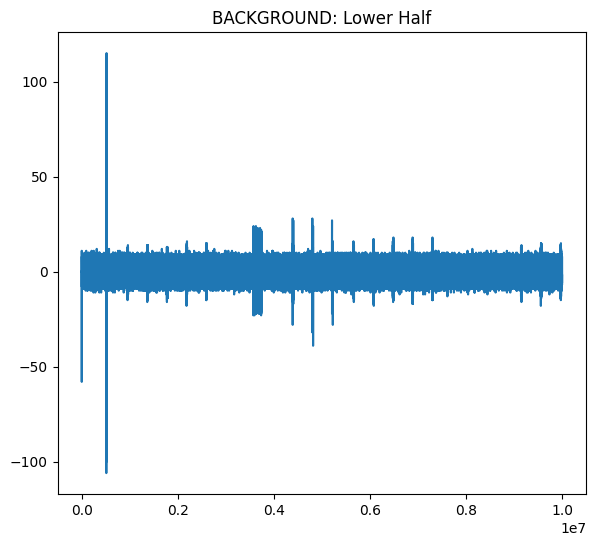

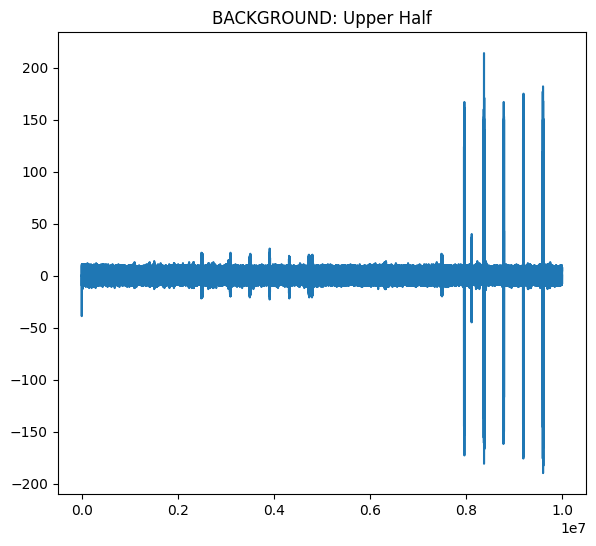

In [8]:
# Plotar o arquivo csv que contem as medições do sinal de referência chamado background RF
# Importante notar que são dois arquivo High e Low
# O aquivo Low contém dados com banda de 40MHz na faixa de 2400 a 2440 MHz
# O arquivo High contem dados de medidas com banda de 40 MHz de 2440 a 2480 MHz
# Essa divisão ocorre em função de limitação do equipamento que so pode medir sinais de banda 40 MHz.



Back_RF_L=np.fromfile('/content/drive/MyDrive/Drone Phantom/00000L_0.csv', sep=',', dtype=np.double)
Back_RF_H=np.fromfile('/content/drive/MyDrive/Drone Phantom/00000H_0.csv', sep=',', dtype=np.double)

fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(Back_RF_L)
plt.title('BACKGROUND: Lower Half')

fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(Back_RF_H)
plt.title('BACKGROUND: Upper Half')

In [9]:
# Transformada de fourier discreta (TFD) para sinais discretizados no tempo
# Objetivo da TFD é calcular o sinal correspondente ao domínio da frequência
# TFD é útil para identificar frequências utilizadas e extrair informação de interesse
# TFD no domínio da frequência é calculado por fft

# Segue o exemplo de uma sequência x

from scipy.fft import fft, ifft
x=np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y=fft(x)
print(y)
yinv=ifft(y)
print(yinv)






[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]


In [10]:
# Aplicando a fft ao elemento do dataset e calculando a transformada inversa 


a=X_L[0]
print(a[1050])

#calcula a TFD e armazena em b
b=fft(a)

#calcula a TFD inversa e armazena em c
c=ifft(b)

# c[1050] deve ser aproximadamente igual a a[1050]
print(c[1050])


-1345.0
(-1344.9999999999993+1.9665658641126605e-13j)


<ipython-input-11-c2d40bfffa49>:9: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  sinal = np.fromfile('/content/drive/MyDrive/Drone Phantom/11000L_0.csv', sep=',', dtype=np.double)


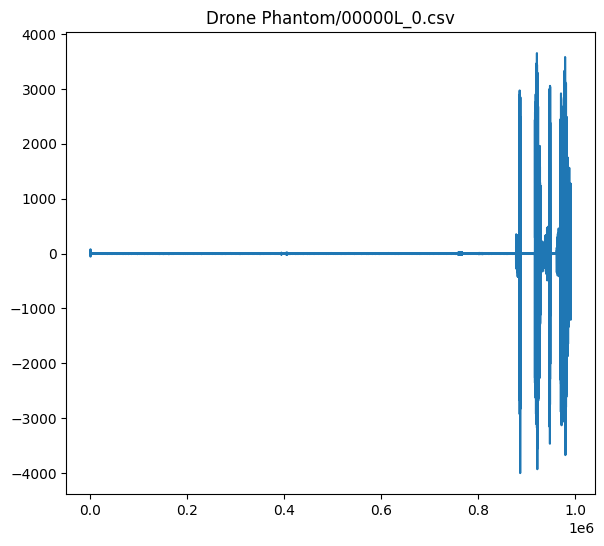

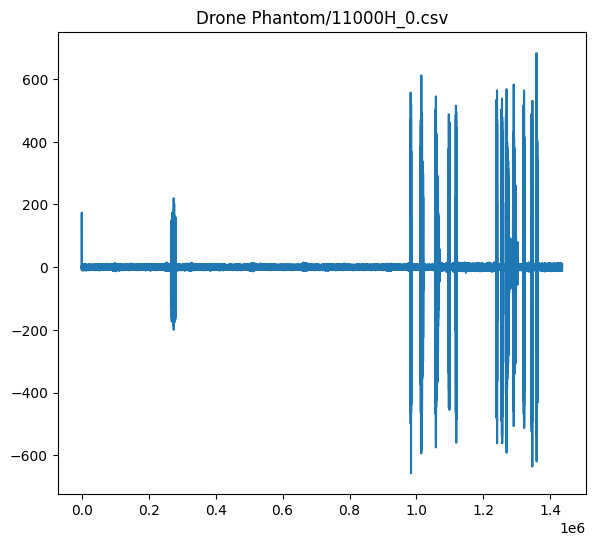

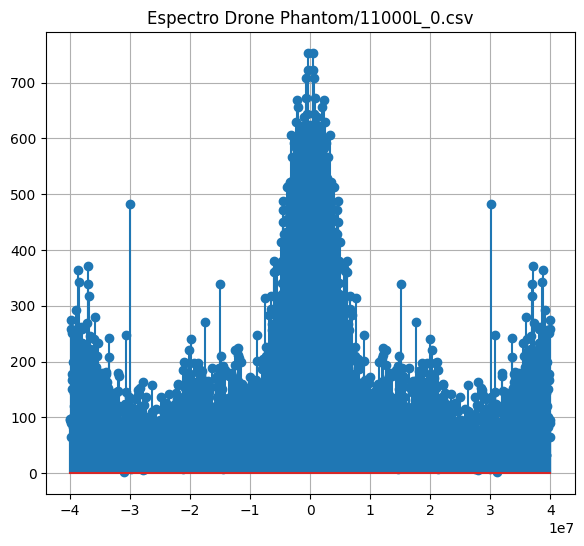

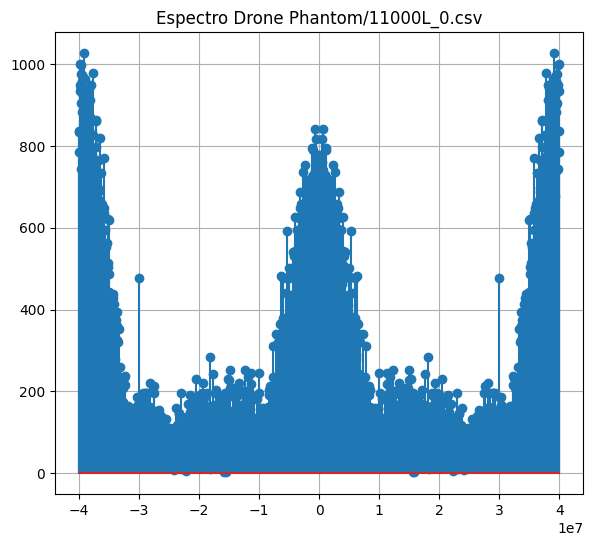

In [11]:
# Visualização do Sinal do PHANTOM no tempo
# Visualização do Sinal do PHANTOM na frequência aplicando fft

from numpy.fft import fft

#plota o sinal variando com o tempo 
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
sinal = np.fromfile('/content/drive/MyDrive/Drone Phantom/11000L_0.csv', sep=',', dtype=np.double)
plt.plot(sinal) #plota sinal
plt.title('Drone Phantom/00000L_0.csv')

#plota o sinal variando com o tempo 
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
sinalh = np.fromfile('/content/drive/MyDrive/Drone Phantom/11000H_0.csv', sep=',', dtype=np.double)
plt.plot(sinalh) #plota sinal
plt.title('Drone Phantom/11000H_0.csv')


#plota o sinal no domínio da frequência usando TFD
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
fourier_sinal = np.fft.fft(sinal, 2048) #calcula a transformada com 2048 pontos
f = np.linspace(-40e6,40e6,len(fourier_sinal))
plt.stem(f,np.abs(fourier_sinal))
plt.title('Espectro Drone Phantom/11000L_0.csv')
plt.grid()

#plota o sinal no domínio da frequência usando TFD
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
fourier_sinalh = np.fft.fft(sinalh, 2048) #calcula a transformada com 2048 pontos
f = np.linspace(-40e6,40e6,len(fourier_sinalh))
plt.stem(f,np.abs(fourier_sinalh))
plt.title('Espectro Drone Phantom/11000L_0.csv')
plt.grid()




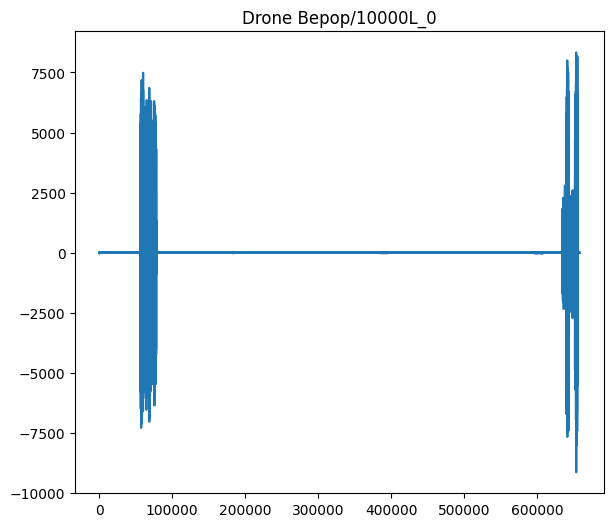

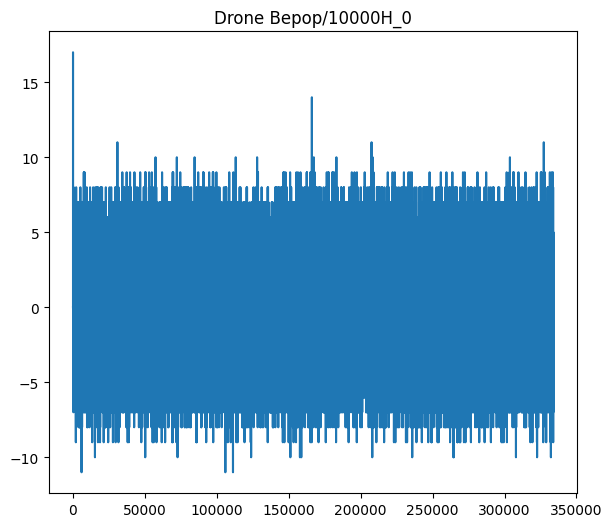

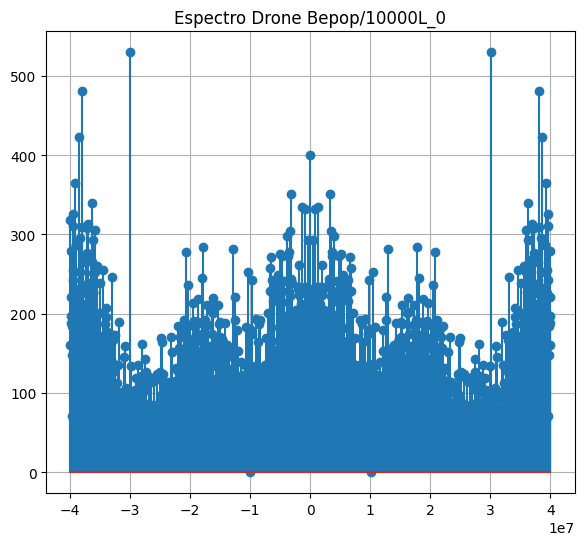

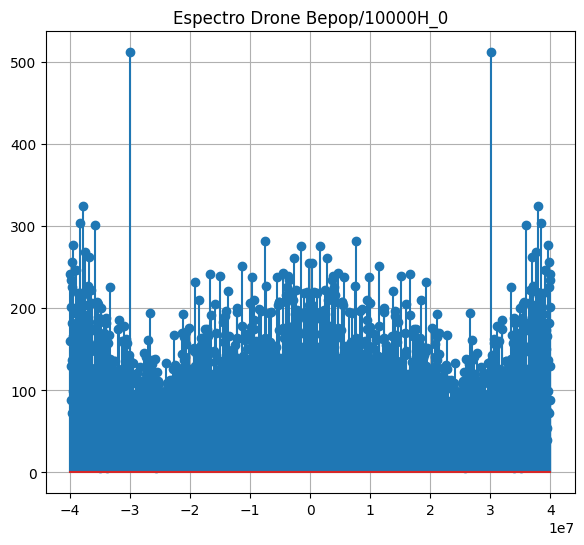

In [12]:
# Visualização do Sinal Bepop no tempo
# Visualização do Sinal Bepop na frequência aplicando fft


# Plota o sinal variando com o tempo 
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
sinal = np.fromfile('/content/drive/MyDrive/Drone Bepop/10000L_0.csv', sep=',', dtype=np.double)
plt.plot(sinal) #plota sinal
plt.title('Drone Bepop/10000L_0')

# Plota o sinal variando com o tempo 
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
sinalh = np.fromfile('/content/drive/MyDrive/Drone Bepop/10000H_0.csv', sep=',', dtype=np.double)
plt.plot(sinalh) #plota sinal
plt.title('Drone Bepop/10000H_0')


#plota o sinal no domínio da frequência usando TFD
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
fourier_sinal = np.fft.fft(sinal, 2048) #calcula a transformada com 2048 pontos
f = np.linspace(-40e6,40e6,len(fourier_sinal))
plt.stem(f,np.abs(fourier_sinal))
plt.title('Espectro Drone Bepop/10000L_0')
plt.grid()

#plota o sinal no domínio da frequência usando TFD
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
fourier_sinalh = np.fft.fft(sinalh, 2048) #calcula a transformada com 2048 pontos
f = np.linspace(-40e6,40e6,len(fourier_sinalh))
plt.stem(f,np.abs(fourier_sinalh))
plt.title('Espectro Drone Bepop/10000H_0')
plt.grid()

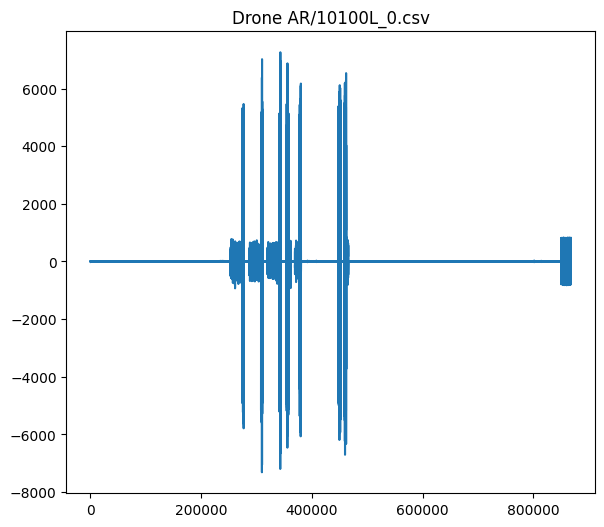

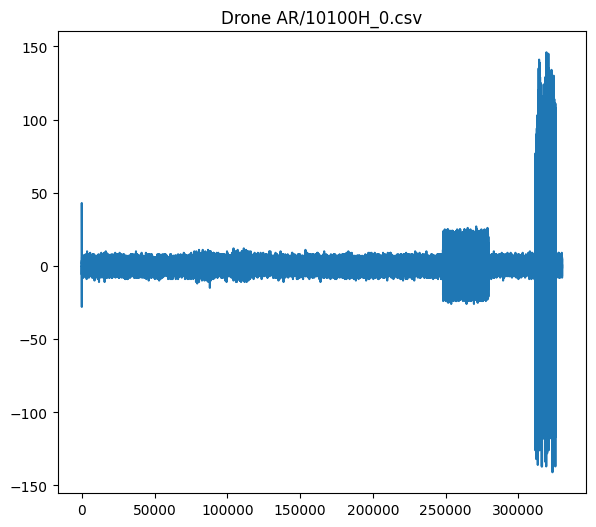

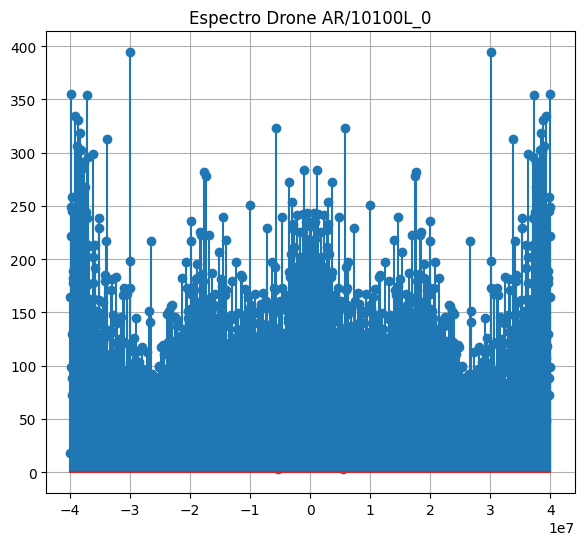

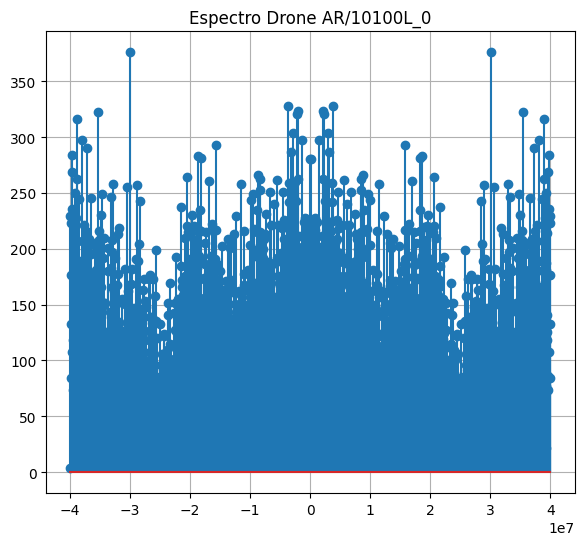

In [13]:
# Visualização do Sinal Drone AR no tempo
# Visualização do Sinal Drone AR na frequência aplicando fft

from numpy.fft import fft

#plota o sinal variando com o tempo 
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
sinal = np.fromfile('/content/drive/MyDrive/Drone AR/10100L_0.csv', sep=',', dtype=np.double)
plt.plot(sinal) #plota sinal
plt.title('Drone AR/10100L_0.csv')

# Plota o sinal variando com o tempo 
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
sinalh = np.fromfile('/content/drive/MyDrive/Drone AR/10100H_0.csv', sep=',', dtype=np.double)
plt.plot(sinalh) #plota sinal
plt.title('Drone AR/10100H_0.csv')


# Plota o sinal no domínio da frequência usando TFD
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
fourier_sinal = np.fft.fft(sinal, 2048) #calcula a transformada com 2048 pontos
f = np.linspace(-40e6,40e6,len(fourier_sinal))
plt.stem(f,np.abs(fourier_sinal))
plt.title('Espectro Drone AR/10100L_0')
plt.grid()

# Plota o sinal no domínio da frequência usando TFD
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
fourier_sinalh = np.fft.fft(sinalh, 2048) #calcula a transformada com 2048 pontos
f = np.linspace(-40e6,40e6,len(fourier_sinalh))
plt.stem(f,np.abs(fourier_sinalh))
plt.title('Espectro Drone AR/10100L_0')
plt.grid()

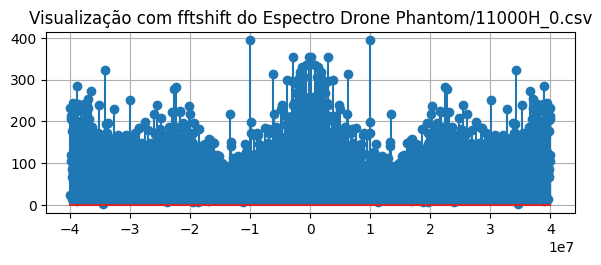

In [14]:
# Melhorar a visualização do espectro usando fftshift

from scipy.fft import fft, ifft

fourier_sinal=np.fft.fftshift(np.fft.fft(sinal,2048))  #deve especificar o tamanho 2048 para acelerar calculo

f=np.linspace(-40e6,40e6,len(fourier_sinal))

fig = plt.figure(figsize=(15,8))
plt.subplot(321)
plt.stem(f,np.abs(fourier_sinal))
plt.title('Visualização com fftshift do Espectro Drone Phantom/11000H_0.csv')
plt.grid()


In [15]:
Back_RF_L=np.fromfile('/content/drive/MyDrive/Drone Phantom/00000L_0.csv', sep=',', dtype=np.double)
Back_RF_H=np.fromfile('/content/drive/MyDrive/Drone Phantom/00000H_0.csv', sep=',', dtype=np.double)

In [16]:
X_L[0].shape

(606180,)

In [17]:
Back_RF_L.shape

(10000000,)

In [18]:
# Calcular a Energia de um Sinal referentes às tabelas .csv
# 11000L_1 e 11000H_1 correspondem a medições realizadas de 2400-2440 MHz e de 2440 a 2480 MHz, referentes ao Phantom
# 11000L_2 e 11000H_2 Ccorrespondem a outra medição para essas mesmas faixas, referentes ao Phantom

# Para calcular a energia, deve-se concatenar as duas tabelas para formar outro array que vai corresponder a medições em 2400-2480 MHz
# Formato desse array deve ser array_concat[11000_L1:11000_H1, 11000_L2:11000_H2, ..., 11000_L21:11000_H21]

# Cada elemento desse novo array representa uma medição. E cada medição tem sua energia em dB característica
# Para os outros drones, idem mas os arquivos correspondentes para o drone  10100L_1.csv e 10100H_1.csv
# Bepop 10000L_0.csv w 10000H_0.csv


array1 = np.fromfile('/content/drive/MyDrive/Drone Phantom/00000L_0.csv', sep=',', dtype=np.double)
array2=np.fromfile('/content/drive/MyDrive/Drone Phantom/00000H_0.csv', sep=',', dtype=np.double)


concatenated_array = []
for i in range(len(array1)):
    concatenated_array.append(array1[i] + array2[i])





In [21]:
# Calcular Energia de um sinal
import numpy as np


sinal_quadrado=np.power(Back_RF_L,2)

energiaref=np.sum(sinal_quadrado)
energia_dBref=10*np.log10(energiaref)

print(energia_dBref) # Esse valor ou abaixo dele caracteriza ausência de drone
                  # sem voo de drone


79.0491684251797


In [22]:
# Calcular Energia de um sinal

sinal=X_L[1]

sinal_quadradoXi=np.power(sinal,2)

energia_Xi=np.sum(sinal_quadradoXi)
energia_XidB=10*np.log10(energia_Xi)

print(energia_XidB)

107.27527564662564


In [23]:
#Calcular Energia de um sinal

sinal=Y_L[18]

sinal_quadradoY=np.power(sinal,2)

energia_Yi=np.sum(sinal_quadradoY)
energia_YidB=10*np.log10(energia_Yi)
print(energia_YidB)

109.75447118916796


In [25]:
# Calcular Energia de um sinal

sinal=Z_L[4]

sinal_quadradoZi=np.power(sinal,2)

energia_Zi=np.sum(sinal_quadradoZi)
energia_ZidB=10*np.log10(energia_Zi)
print(energia_ZidB)

66.00869153311695


In [26]:
# Calcular a energia de cada sinal do Phantom 

# Concatena o sinal X referente ao Phantom
array1 = X_L
array2= X_H


X = []
for i in range(len(array1)):
    X.append(array1[i] + array2[i])



 
 

In [27]:
#Calcula a energia em dB

energia_XdB=[]
for array in X:
  sinal_quadradoX=np.power(array, 2)
  b=np.sum(sinal_quadradoX)
  c=10*np.log10(b)
  energia_XdB.append(c)

In [28]:
print(energia_XdB)

[115.90808617581935, 113.29587555990527, 113.46427093867564, 114.14031159811215, 114.34061084642272, 116.15451408033124, 110.46182837276034, 111.21420607240691, 114.71278540057418, 108.01226920658358, 116.30436271493694, 109.14738964883915, 112.05049608485928, 115.48182211397432, 108.34761734478134, 115.33168276430439, 116.85232233645038, 115.45318984035131, 116.31751144080113, 77.90883725807565, 104.85132312260367, 85.06976833845933]
